<a href="https://colab.research.google.com/github/bantee-sharma/IMDB-Review-Sentiment-LSTM-GRU/blob/main/LSTM_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,Embedding,LSTM,GRU,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.utils import pad_sequences
import re,os

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

100%|██████████| 25.7M/25.7M [00:00<00:00, 116MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


In [ ]:
# Assuming the dataset is downloaded and stored in the 'path' variable
dataset_folder = path

# List the files in the directory to check the dataset files
files = os.listdir(dataset_folder)
print("Files in the dataset folder:", files)

# Load the CSV file
# The file name is 'IMDB Dataset.csv' based on the output of os.listdir(dataset_folder)
dataset_file = os.path.join(dataset_folder, "IMDB Dataset.csv")
df = pd.read_csv(dataset_file)

Files in the dataset folder: ['IMDB Dataset.csv']


In [ ]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.shape

(50000, 2)

In [ ]:
df['sentiment'].value_counts().reset_index()

,sentiment,count
0,positive,25000
1,negative,25000


In [ ]:
# Clean the text (remove HTML tags, punctuation, and lowercase)
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    return text

# Apply cleaning
df['review'] = df['review'].apply(clean_text)

In [ ]:
# Convert sentiments to binary labels
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


In [ ]:
#tokenize text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['review'])

In [ ]:
seq = tokenizer.texts_to_sequences(df['review'])

In [ ]:
#pad seq
pad_seq = pad_sequences(seq,maxlen = 200,padding = 'post')

In [ ]:
pad_seq

array([[   1,    9, 2580, ...,  122, 3940,  499],
       [   4,  382,  115, ...,    0,    0,    0],
       [  10,  193,   11, ...,    0,    0,    0],
       ...,
       [  18,   57,   21, ...,    1,    3, 5866],
       [ 499,   15,    1, ...,   68,  704,   42],
       [  55,   28, 5642, ...,    0,    0,    0]], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
xtrain, xtest, ytrain, ytest = train_test_split(pad_seq, df['sentiment'], test_size=0.2, random_state=42)


In [ ]:
xtrain.shape,ytrain.shape

((40000, 200), (40000,))

In [ ]:
# Build the model
model = Sequential()
model.add(Embedding(10000,output_dim=100,input_length = 200))
model.add(LSTM(128,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
input_length = 200
batch_size = 64

In [ ]:
model.build(input_shape=(batch_size,input_length))

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (64, 200, 100)              │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (64, 128)                   │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (64, 128)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (64, 1)                     │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,117,377 (4.26 MB)

 Trainable params: 1,117,377 (4.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
# Define the Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
# Train the model
history = model.fit(xtrain, ytrain, epochs=20, batch_size=64, validation_data=(xtest, ytest),verbose=1,callbacks=[early_stopping])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5353 - loss: 0.6870 - val_accuracy: 0.6119 - val_loss: 0.6453
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6846 - loss: 0.5564 - val_accuracy: 0.8746 - val_loss: 0.3043
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9013 - loss: 0.2585 - val_accuracy: 0.8848 - val_loss: 0.2716
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9317 - loss: 0.1905 - val_accuracy: 0.8868 - val_loss: 0.2857
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9540 - loss: 0.1379 - val_accuracy: 0.8854 - val_loss: 0.3020
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9713 - loss: 0.0953 - val_accuracy: 0.8812 - val_loss: 0.3424


In [ ]:
# Evaluate the model train
loss, accuracy = model.evaluate(xtrain, ytrain)
print(f"train Loss: {loss:.4f}, train Accuracy: {accuracy * 100:.2f}%")

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9382 - loss: 0.1835
train Loss: 0.1827, train Accuracy: 93.84%


In [ ]:
# Evaluate the model test
loss, accuracy = model.evaluate(xtest, ytest)
print(f"test Loss: {loss:.4f}, test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8832 - loss: 0.2771
test Loss: 0.2716, test Accuracy: 88.48%


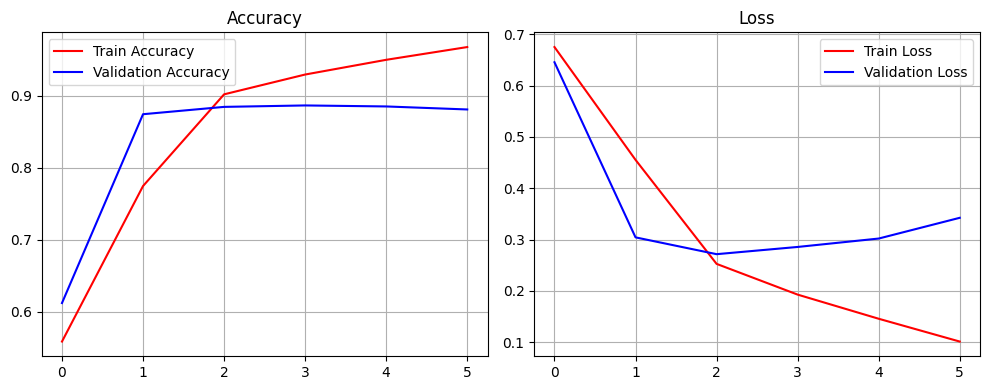

In [ ]:
# Create a figure
plt.figure(figsize=(10, 4))

# Subplot 1: )
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.grid()

# Subplot 2:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='red', label='Train Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()
